In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Import Scikit_Learn libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score


Simple linear Regression

In [ ]:
#Predict how much loan amount can they apply for by annual income of customer

In [3]:
#one feautr -one target

In [4]:
df = pd.read_csv('financial_loan_data.csv')

In [5]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2/11/2021,9/13/2021,4/13/2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,1/1/2021,12/14/2021,1/15/2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,1/5/2021,12/12/2021,1/9/2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2/25/2021,12/12/2021,3/12/2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,1/1/2021,12/14/2021,1/15/2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


#Define Feature and Target

In [7]:
xVar = 'annual_income'
yVar = 'loan_amount'

In [8]:
#Feautre
X = df[[xVar]]
#Target
Y = df[yVar]

Train and Test Data

In [10]:
X_train ,X_test ,Y_train , Y_test = train_test_split(
    X,Y,test_size=0.2,random_state = 42
)

Fit data in model

In [19]:
model = LinearRegression()

In [21]:
model.fit(X_train,Y_train)

LinearRegression()

In [23]:
Y_pred = model.predict(X_test)

In [25]:
Y_pred

array([12213.26888783, 10413.19663251, 12263.36577539, ...,
       10379.03966372, 10370.50042152, 10396.11814811])

In [27]:
beta_0 = model.intercept_
beta_1 = model.coef_[0]

In [29]:
print(f"Intercept:{beta_0}")
print(f"Slope/coefficient:{beta_1}")

Intercept:9303.095146782538
Slope/coefficient:0.028464140659650895


Calculate Metrices

In [32]:
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
r2 = r2_score(Y_test,Y_pred)

In [34]:
print(f"RMSE : {rmse}")
print(f"R2 Score:{r2}")

RMSE : 7112.284646213263
R2 Score:0.09134780276962673


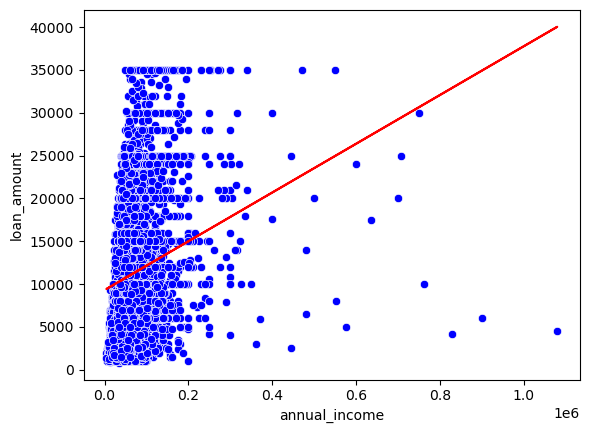

In [36]:
sns.scatterplot(x = X_test[xVar],y=Y_test,color='blue')
plt.plot(X_test[xVar],Y_pred,color='red')

In [39]:
#Predict new data
new_annual_income = {
    'annual_income':[100000,300000,1000000]
}

In [41]:
X_new = pd.DataFrame(new_annual_income)

In [43]:
X_new

,annual_income
0,100000
1,300000
2,1000000


In [45]:
Y_new_pred = model.predict(X_new)
Y_new_pred

array([12149.50921275, 17842.33734468, 37767.23580643])

In [47]:
X_new['Predicted_Loan_Amount'] = Y_new_pred

In [49]:
X_new

,annual_income,Predicted_Loan_Amount
0,100000,12149.509213
1,300000,17842.337345
2,1000000,37767.235806
